In [6]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [7]:
#mengunduh file dalam bentuk zip sesuai peintah
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2020-07-12 13:57:00--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  34.8MB/s    in 9.9s    

2020-07-12 13:57:10 (31.2 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [8]:
#mengekstraksi file zip yg sudah diunduh
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [9]:
os.listdir('/tmp/rockpaperscissors')

['paper', 'rock', 'README_rpc-cv-images.txt', 'scissors', 'rps-cv-images']

In [10]:
#mengecek banyaknya image pada masing-masing direktori
len(os.listdir('/tmp/rockpaperscissors/rock')) #batu

726

In [11]:
len(os.listdir('/tmp/rockpaperscissors/paper')) #kertas

712

In [12]:
len(os.listdir('/tmp/rockpaperscissors/scissors')) #gunting

750

In [13]:
#membuat directory name
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

# membuat direktori train dan validation
os.mkdir(train_dir)
os.mkdir(val_dir)

In [14]:
# membuat direktori masing-masing sesuai nama bentuknya
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [15]:
# memecah direktori menjadi data training dan data validation

# rock
training_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.2)

# scissors
training_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.2)

#paper
training_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.2)

In [17]:
# memindahkan data training dan validation sesuai dengan nama bentuknya
training_scissors = os.path.join(train_dir, 'scissors')
training_rock = os.path.join(train_dir, 'rock')
training_paper = os.path.join(train_dir, 'paper')
val_scissors = os.path.join(val_dir, 'scissors')
val_rock = os.path.join(val_dir, 'rock')
val_paper = os.path.join(val_dir, 'paper')

In [21]:
# membuat direktori baru sesuai dengan data training dan validation
if not os.path.exists(training_rock):
  os.mkdir(training_rock)
if not os.path.exists(training_paper):
  os.mkdir(training_paper)
if not os.path.exists(training_scissors):
  os.mkdir(training_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

In [23]:
# menyalin data train dan data val ke directory baru
import shutil

for i in training_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(training_rock, i))
for i in training_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(training_paper,i))
for i in training_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(training_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [24]:
# membuat objek ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [26]:
# model mempelajari data training
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

valid_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [27]:
# membuat model
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(256,(3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(3, activation = 'softmax')

])

In [34]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['accuracy']
              )

In [42]:
# pelatihan model
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = valid_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 43s - loss: 1.0522 - accuracy: 0.4888 - val_loss: 1.1696 - val_accuracy: 0.3812
Epoch 2/20
25/25 - 42s - loss: 0.7382 - accuracy: 0.6946 - val_loss: 0.3220 - val_accuracy: 0.8750
Epoch 3/20
25/25 - 42s - loss: 0.3558 - accuracy: 0.8712 - val_loss: 0.3756 - val_accuracy: 0.8625
Epoch 4/20
25/25 - 42s - loss: 0.2498 - accuracy: 0.9151 - val_loss: 0.1116 - val_accuracy: 0.9625
Epoch 5/20
25/25 - 42s - loss: 0.1868 - accuracy: 0.9375 - val_loss: 0.3007 - val_accuracy: 0.8750
Epoch 6/20
25/25 - 42s - loss: 0.1938 - accuracy: 0.9442 - val_loss: 0.1678 - val_accuracy: 0.9500
Epoch 7/20
25/25 - 43s - loss: 0.1274 - accuracy: 0.9525 - val_loss: 0.1013 - val_accuracy: 0.9688
Epoch 8/20
25/25 - 42s - loss: 0.1607 - accuracy: 0.9506 - val_loss: 0.1170 - val_accuracy: 0.9688
Epoch 9/20
25/25 - 42s - loss: 0.1121 - accuracy: 0.9544 - val_loss: 0.0753 - val_accuracy: 0.9750
Epoch 10/20
25/25 - 46s - loss: 0.0842 - accuracy: 0.9785 - val_loss: 0.1697 - val_accuracy: 0.9250
Epoch 11/

Saving sampleML.png to sampleML.png
sampleML.png
it's scissors


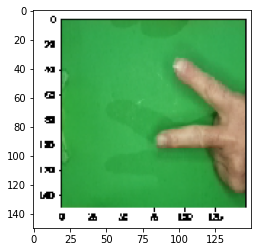

In [44]:
# proses pemasukan gambar dari user

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print("it's paper")
  elif classes[0,1]!=0:
    print("it's rock")
  else:
    print("it's scissors")